### Decision Trees Example 6.1
We use the **Hitters** data set to predict a baseball player’s **Salary** based on **Years** (the number of years that he has played in the major leagues) and
**Hits** (the number of hits that he made in the previous year). We log-transform **Salary** so that its distribution has more of a typical bell-shape. (Recall that **Salary** is measured in thousands of dollars.)


In [1]:
import pandas as pd
import numpy as np
from sklearn import tree

# Load data
df = pd.read_csv('./data/Hitters.csv')

y = np.log(df['Salary'])
x = df.loc[:, ['Years', 'Hits']]

# Create and fit Decision tree classifier
reg = tree.DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, 
                                 min_impurity_decrease=0.05, 
                                 random_state=0)
reg = reg.fit(x, y)

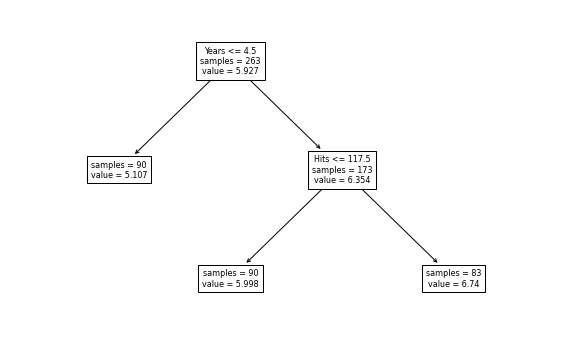

In [2]:
import matplotlib.pyplot as plt

# Plots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Decision Tree
tree.plot_tree(reg, ax=ax, impurity=False, fontsize=8, 
               feature_names=x.columns.values )
plt.show()

The figure shows a regression tree fit to this data. It consists of a series of splitting rules, starting at the top of the tree. 

The top split assigns observations having **Years**$<4.5$ to the left branch. The predicted salary for these players is given by the mean response value for the players in the data set with **Years**$<4.5$. For such players, the mean log salary is $5.107$, and so we make a prediction of $e^{5.107}$ thousands of dollars, i.e. 165'174 dollars, for these players. 


Players with **Years**$\geq 4.5$ are assigned to the right branch, and then that group is further subdivided by **Hits**. Overall, the tree stratifies or segments the players into three regions of predictor space: players who have played for four or fewer years, players who have played for five or more years and who made fewer than $118$ hits last year, and players who have played for five or more years and who made at least $118$ hits last year. These three regions can be written as $R_1 =\{X | Years<4.5\}$, $R_2 =\{X | Years >=4.5, Hits < 117.5\}$, and $R_3 =\{X | Years>=4.5, Hits>=117.5\}$.


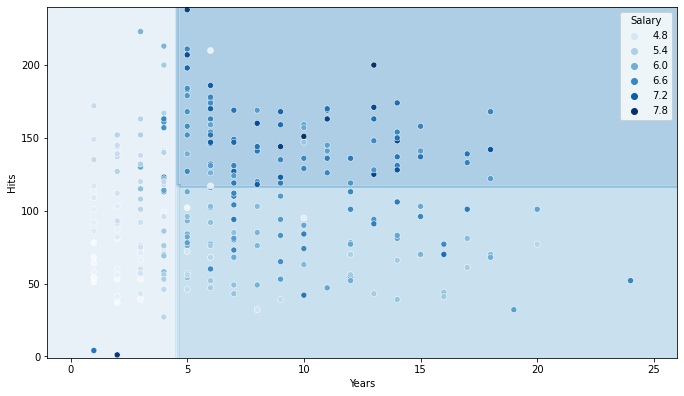

In [3]:
from matplotlib import cm
import seaborn as sns

# Create grid
margin, n = 2, 100
xx = np.linspace(min(x['Years']) - margin, max(x['Years']) + margin, n)
yy = np.linspace(min(x['Hits']) - margin, max(x['Hits']) + margin, n)
yy, xx = np.meshgrid(yy, xx)

# Predict
Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot surface
ax.contourf(xx, yy, Z, cmap='Blues', alpha=0.4, 
               vmin=y.min(), vmax=y.max())

# Plot datapoints
sns.scatterplot(x=x['Years'], y=x['Hits'],  ax=ax,
                hue=y, palette='Blues')

plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)    
plt.show()

The figure illustrates the regions as a function of **Years** and **Hits**. The predicted salaries for these three groups are $1000 * e^{5.107} =165'174$ dollars, $1000 * e^{5.999} = 402'834$ dollars, and $1000 * e^{6.740} =845'346$ dollars respectively.